# **<span style="font-family: 'Palatino Linotype', serif;">🐢🐇 Comparando as performances</span>**
----
*<span style="font-family: 'Angilla Tattoo'"> "Testaram minha performance em 12 realidades. Em todas, fui banida por ser apelona."⚡🎮🚷 </span>*

*<span style="font-family: 'Angilla Tattoo'"> - Maga Patolina </span>*

<div align="center">
    <img src = "Maga dimensoes.png" alt = "Maga nas realidades" width = 300>
</div>

----
 **Objetivo:** Nesse notebook, irei comparar o tempo de resolução de três algoritmos de otimização (busca aletória, busca em grade e algoritmo genético) no problema das caixas binárias. Para isso, irei selecionar 10 valores distintos de caixas e rodar a mesma busca repetidas vezes para encontrar as médias de  tempo. 
 
---

In [1]:
from funcoes_2 import funcao_objetivo_pop_cb as funcao_objetivo
from funcoes_2 import populacao_cb as cria_populacao
from funcoes_2 import selecao_roleta_max as funcao_selecao
from funcoes_2 import cruzamento_ponto_simples as funcao_cruzamento
from funcoes_2 import mutacao_simples_cb as funcao_mutacao
from funcoes_1 import funcao_objetivo_cb as funcao_objetivo_ba
from funcoes_1 import gene_cb as gene
from funcoes_1 import cria_candidato_cb as cria_candidato 
from pprint import pprint
import random
import time
import itertools
import statistics
import matplotlib.pyplot as plt

----

### 🕵️‍♀️ **Busca aleatória**

In [20]:
NUM_REPETICOES = range(20)
lista_valores_candidatos = list(range(2, 15))
sorteios = 50

tempos_busca_aleatoria_por_tamanho = {}
tempos_busca_aleatoria = []

for tamanho in lista_valores_candidatos:
    tempos_tamanho = []
    # tempo_inicial = time.time()

    for _ in NUM_REPETICOES:
        tempo_inicial = time.time()

        for _ in range(sorteios):
            candidato = cria_candidato(tamanho)  
            func_obj = funcao_objetivo_ba(candidato)
        tempo_final = time.time()
        tempos_tamanho.append(tempo_final - tempo_inicial)

    tempos_busca_aleatoria_por_tamanho[tamanho] = statistics.mean(tempos_tamanho)
        
    tempo_execucao = time.time() - tempo_inicial
    tempos_busca_aleatoria.append(tempo_execucao)

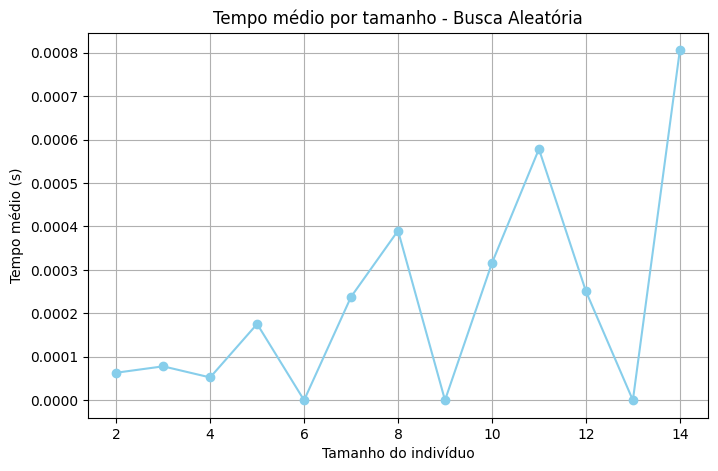

In [39]:
plt.figure(figsize=(8,5))
plt.plot(lista_valores_candidatos,
         [tempos_busca_aleatoria_por_tamanho[t] for t in lista_valores_candidatos],
         marker='o', color='skyblue')
plt.title('Tempo médio por tamanho - Busca Aleatória')
plt.xlabel('Tamanho do indivíduo')
plt.ylabel('Tempo médio (s)')
plt.grid(True)
plt.show()


Para os menores de valores de N dos candidatos, foi possível encontrar a resposta correta do problema. Quanto mais os valores aumentam, mais difícil é para o problema convergir, ou seja, os resultados obtidos se tornam mais distantes do melhor resultado possível. Como os indivíduos tem baixo valor de N, os tempos obtidos pelo algotimo foram baixos.

----

### 🔲 **Busca em grade**

In [27]:
tempos_busca_em_grade = []
tempos_busca_em_grade_por_tamanho = {}

for tamanho in lista_valores_candidatos:
    tempos_tamanho = []

    for _ in NUM_REPETICOES:
        # tempo_inicial = time.time()

        for tamanho in lista_valores_candidatos:
            tempos_tamanho = []

            for _ in NUM_REPETICOES:
                tempo_inicial = time.time()
                todas_combinacoes = list(itertools.product([0, 1], repeat=tamanho))

                for candidato in todas_combinacoes:
                    _ = funcao_objetivo_ba(list(candidato))

                tempo_final = time.time()
                tempos_tamanho.append(tempo_final - tempo_inicial)

                tempos_busca_em_grade_por_tamanho[tamanho] = statistics.mean(tempos_tamanho)
            
    tempo_execucao = time.time() - tempo_inicial
    tempos_busca_em_grade.append(tempo_execucao)

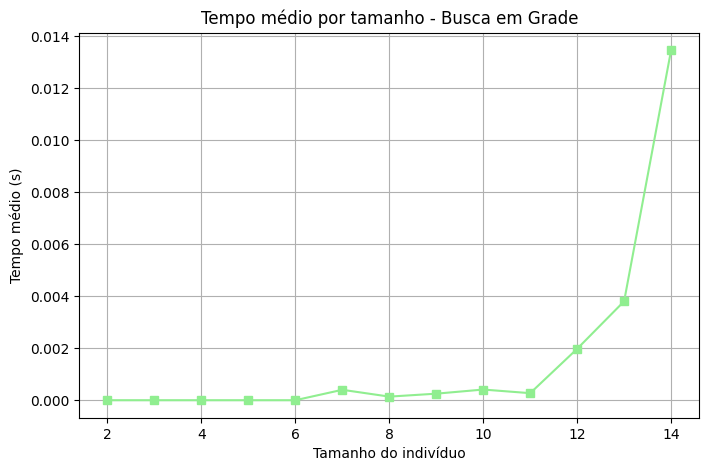

In [40]:
plt.figure(figsize=(8,5))
plt.plot(lista_valores_candidatos,
         [tempos_busca_em_grade_por_tamanho[t] for t in lista_valores_candidatos],
         marker='s', color='lightgreen')
plt.title('Tempo médio por tamanho - Busca em Grade')
plt.xlabel('Tamanho do indivíduo')
plt.ylabel('Tempo médio (s)')
plt.grid(True)
plt.show()

Para a busca em grade, testamos todas as combinações possíveis e, assim, garantimos que iremos encontrar o melhor resultado possível para qualquer valor de N. Porém, conforme o valor de N aumenta, tempo para encontrar a resposta correta tende a crescer de maneira exponencial, de forma que para Ns grandes, esse tipo de busca será muito custoso computacionalmente.

----

### 🧬 **Algoritmo genético**

In [29]:
TAMANHO_POPULACAO = 10
NUM_GERACOES = 50
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05

tempos_algoritmo_genetico = []

In [30]:
hall_da_fama = []
tempos_alg_genetico_por_tamanho = {}


for tamanho in lista_valores_candidatos:
    tempos_tamanho = []

    for _ in NUM_REPETICOES: 
        populacao = cria_populacao(TAMANHO_POPULACAO, tamanho)
        tempo_inicial = time.time()

        for _ in range(NUM_GERACOES):
                
            # Seleção
            fitness = funcao_objetivo(populacao)        
            selecionados = funcao_selecao(populacao, fitness)
                
            # Cruzamento
            proxima_geracao = []
            for pai, mae in zip(selecionados[::2], selecionados[1::2]):
                individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
                proxima_geracao.append(individuo1)
                proxima_geracao.append(individuo2)
                
            # Mutação
            funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
                
            # Atualização do hall da fama
            fitness_nova = funcao_objetivo(proxima_geracao)
            melhor = max(zip(fitness_nova, proxima_geracao), key=lambda x: x[0])[1]
            hall_da_fama.append(melhor)  
                
            # Encerramento
            populacao = proxima_geracao

        tempo_final = time.time()
        tempos_tamanho.append(tempo_final - tempo_inicial)
        
    tempos_alg_genetico_por_tamanho[tamanho] = statistics.mean(tempos_tamanho)

    tempo_execucao = time.time() - tempo_inicial
    tempos_algoritmo_genetico.append(tempo_execucao)

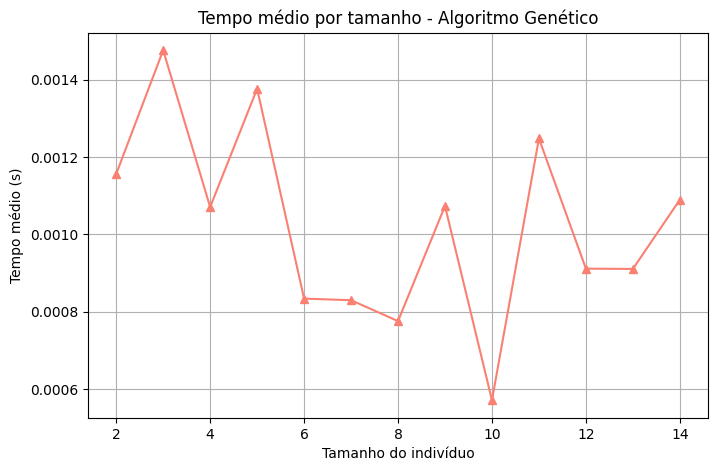

In [41]:
plt.figure(figsize=(8,5))
plt.plot(lista_valores_candidatos,
         [tempos_alg_genetico_por_tamanho[t] for t in lista_valores_candidatos],
         marker='^', color='salmon')
plt.title('Tempo médio por tamanho - Algoritmo Genético')
plt.xlabel('Tamanho do indivíduo')
plt.ylabel('Tempo médio (s)')
plt.grid(True)
plt.show()


Neste gráfico, podemos obsevar que, conforme o valor de N dos indivíduos cresceu, menor se tornou o tempo de execução do algoritmo genético. Esse tipo de algoritmo não garante que a resposta correta para o problema seja encontrada, porém possui uma maior chance de convergir do que a busca aleatória, e são possuem um custo computacional menor do que a busca em grade.

---

### 📌 **Comparando performances**

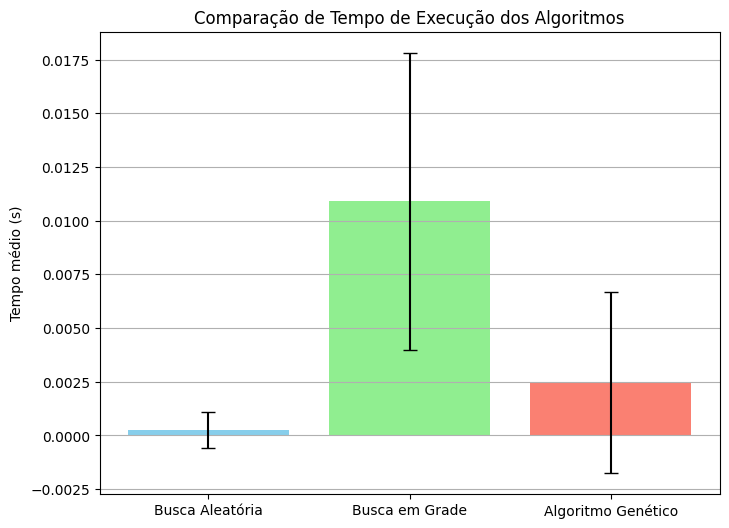

In [42]:
import matplotlib.pyplot as plt

medias = [
    statistics.mean(tempos_busca_aleatoria),
    statistics.mean(tempos_busca_em_grade),
    statistics.mean(tempos_algoritmo_genetico)
]
desvios = [
    statistics.stdev(tempos_busca_aleatoria),
    statistics.stdev(tempos_busca_em_grade),
    statistics.stdev(tempos_algoritmo_genetico)
]
rotulos = ['Busca Aleatória', 'Busca em Grade', 'Algoritmo Genético']

plt.figure(figsize=(8,6))
plt.bar(rotulos, medias, yerr=desvios, capsize=5, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Tempo médio (s)')
plt.title('Comparação de Tempo de Execução dos Algoritmos')
plt.grid(axis='y')
plt.show()


----

### 💡 **Analisando os resultados** 

Podemos observar que o algoritmo de busca aleatória é o que funciona em menor tempo, porém, dificilmente converge para valores maiores de N. O algoritmo em busca grade garante que o melhor resulatado possível será encontrado, porém leva um tempo maior para fazer isso, que aumenta exponencialmente com a quantidade de dados, e é mais custoso computacionalmente. Já os algoritmos genéticos são uma boa forma que, apesar de não garantir o resultado correto, tende a convergir para um bom resultado, em tempo menor e com menos custo computacional. 

----
### 📚 Referências:

OPENAI. ChatGPT (versão GPT-4) [programa de computador]. Disponível em: <https://chatgpt.com/share/6807a849-a330-8005-a38e-db909257b2e9>. Acesso em: 18 abr. 2025.